In [2]:
import os
import pandas as pd

In [3]:
root_path = "../tb_logs_15_09_2023"

In [10]:
filenames = []

for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith(".csv"):
                filename = os.path.join(root, file)
                filenames.append(filename)

filenames = pd.DataFrame(data=filenames)
filenames

,0
0,../tb_logs_15_09_2023/csv_output/EEGInception_...
1,../tb_logs_15_09_2023/csv_output/DeepConvNet_v...
2,../tb_logs_15_09_2023/csv_output/Transformer_v...
3,../tb_logs_15_09_2023/csv_output/EEGNet_versio...
4,../tb_logs_15_09_2023/csv_output/DeepConvNet_v...
...,...
115,../tb_logs_15_09_2023/csv_output/EEGInception_...
116,../tb_logs_15_09_2023/csv_output/Transformer_v...
117,../tb_logs_15_09_2023/csv_output/Transformer_v...
118,../tb_logs_15_09_2023/csv_output/EEGNet_versio...


In [15]:
net_names = ["EEGInception", "EEGNet", "Transformer", "DeepConvNet"]
metric_names = [
    'validation_loss',
    'validation_acc',
    'validation_f1',
    
    'train_loss',
    'train_acc',
    'train_f1',
  ]

/Users/kacper/.pyenv/versions/3.8.16/envs/magisterka/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


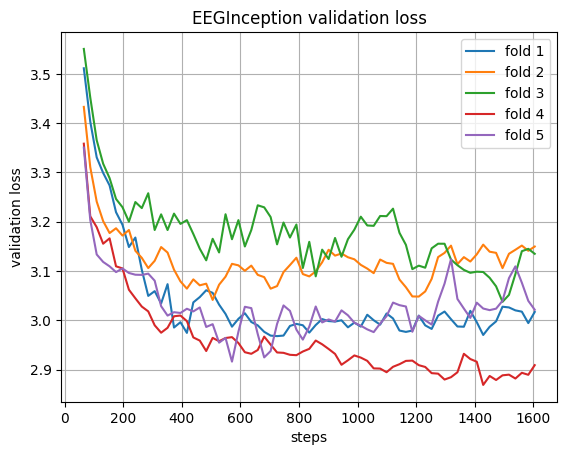

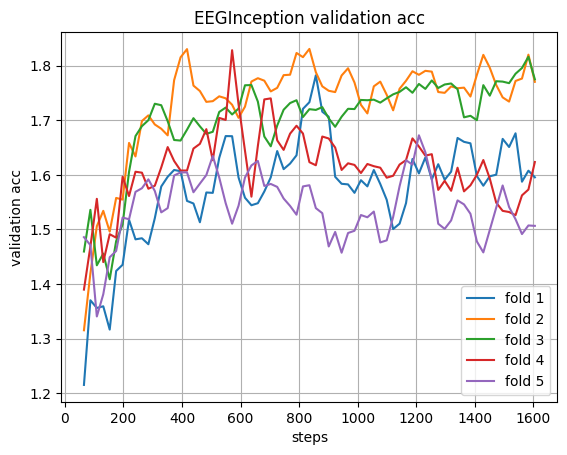

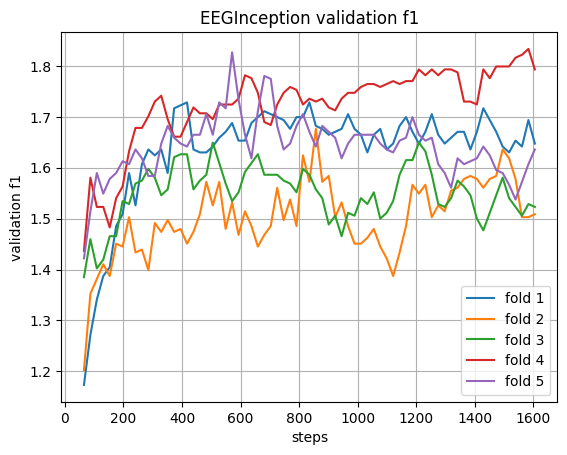

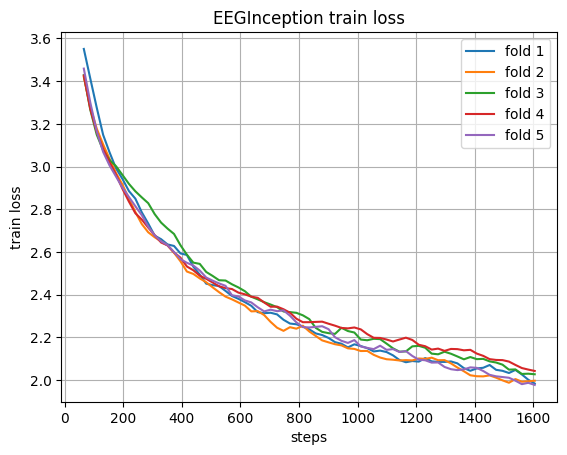

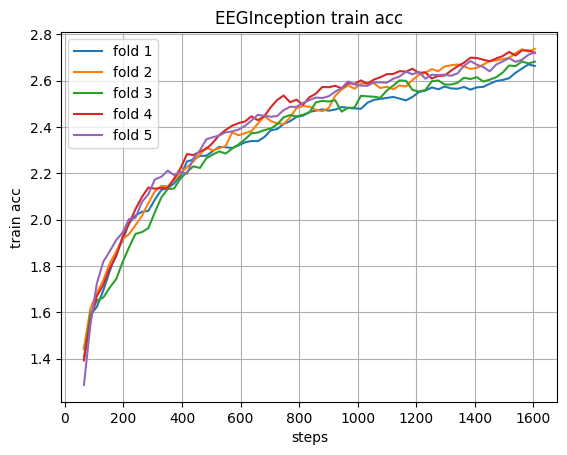

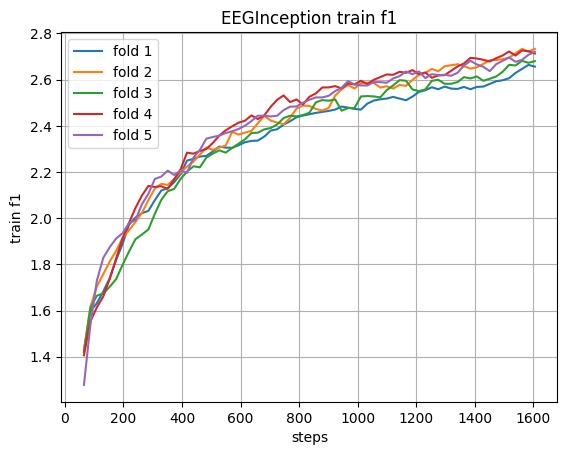

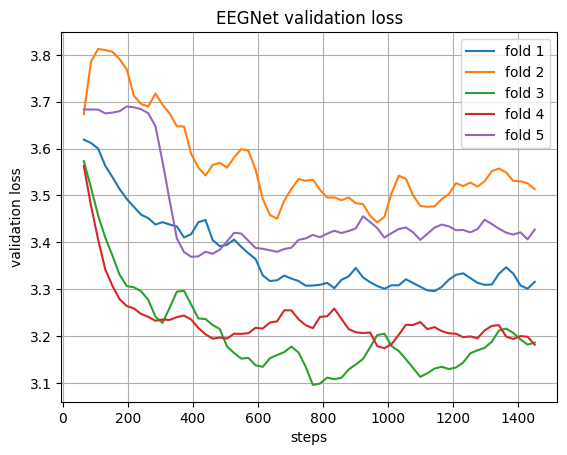

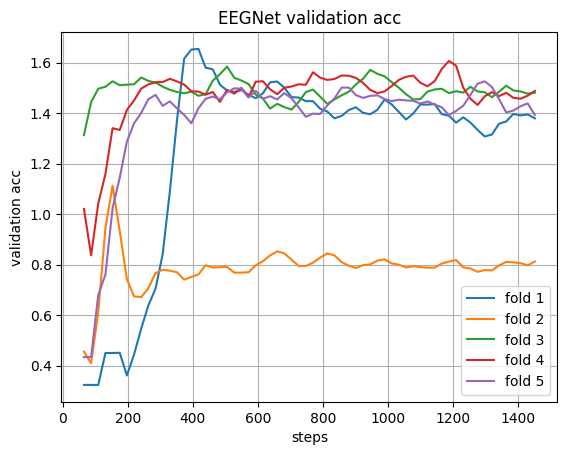

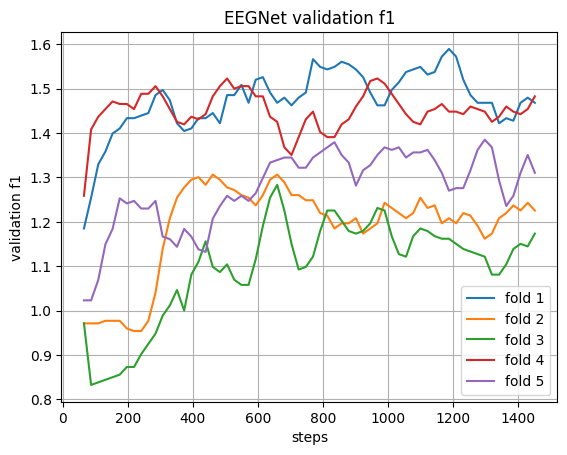

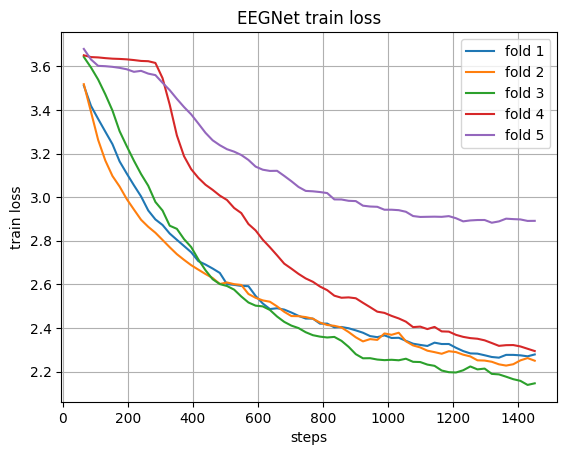

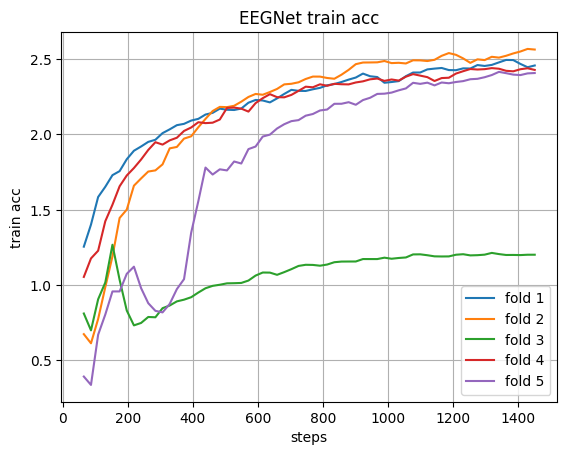

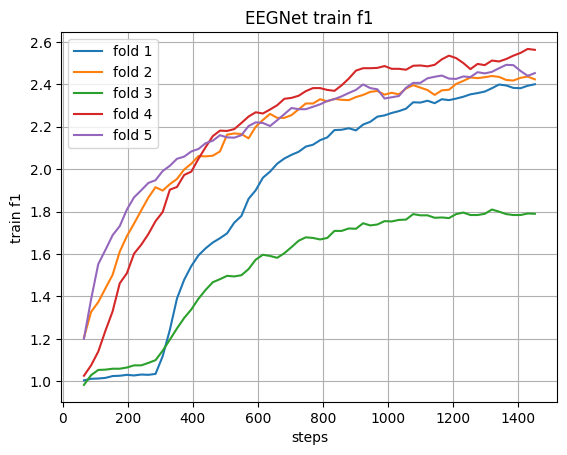

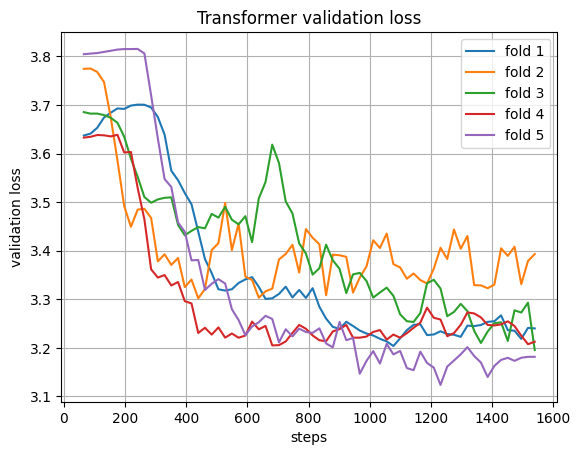

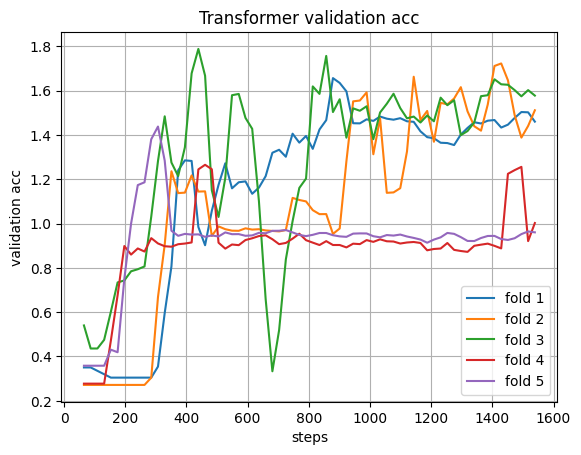

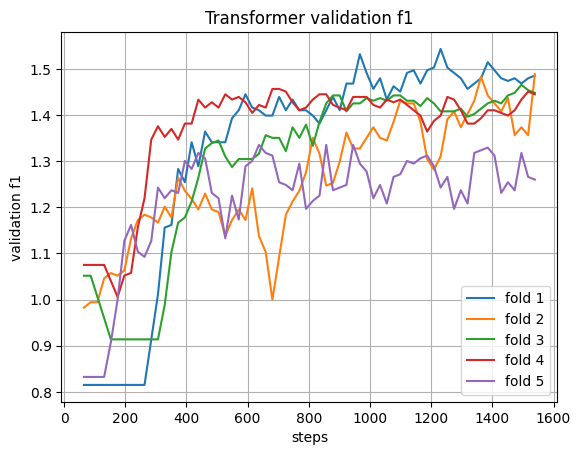

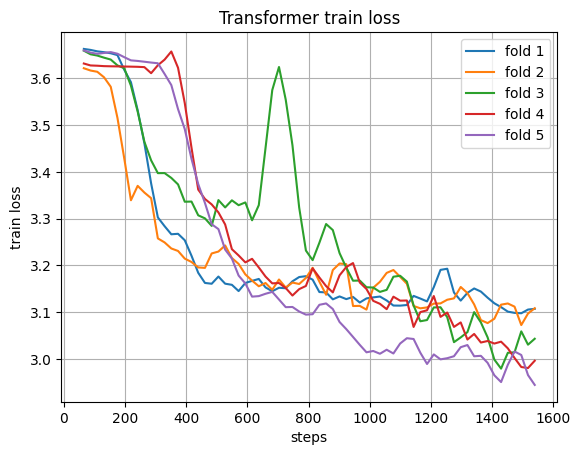

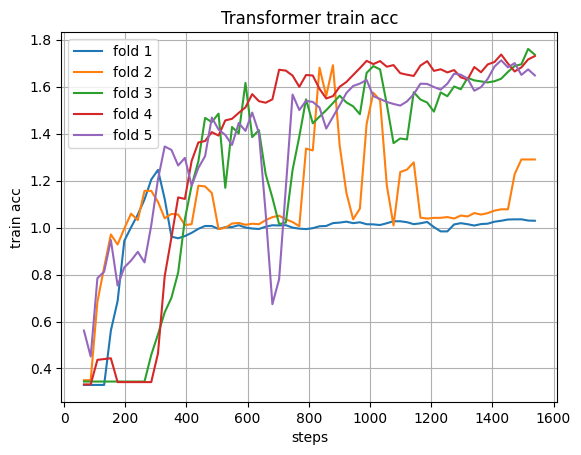

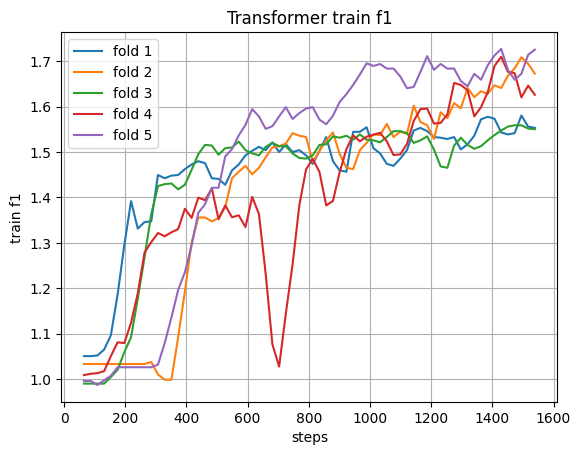

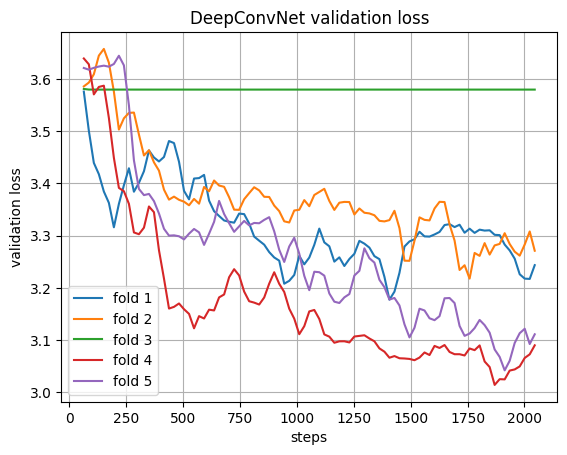

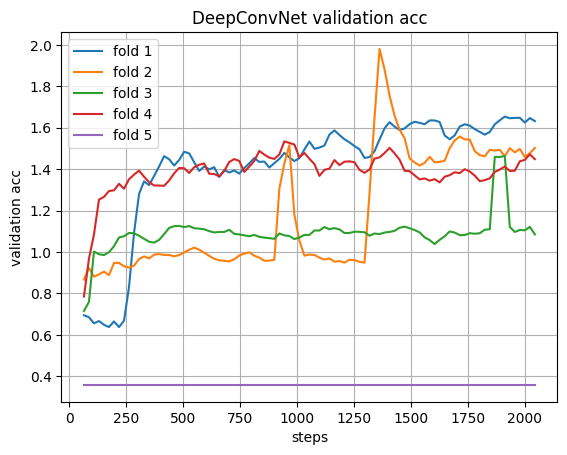

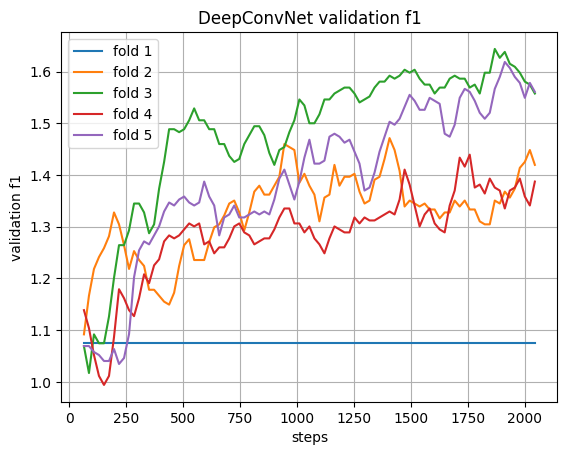

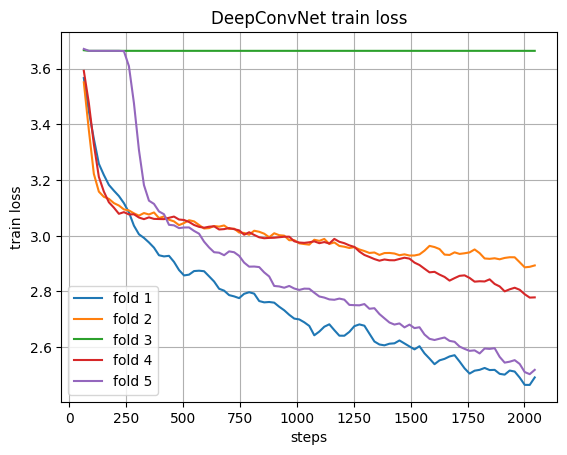

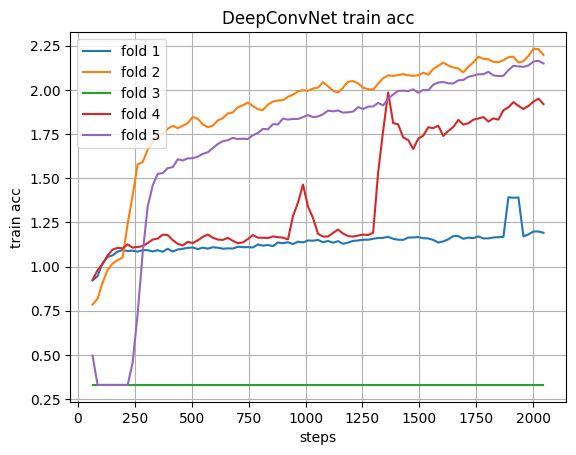

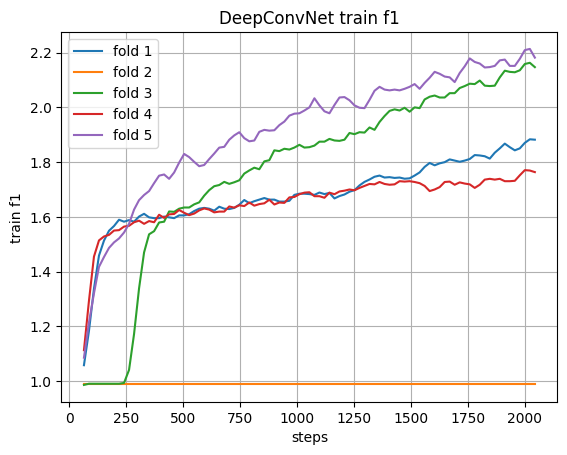

In [73]:
for net_name in net_names:
    df_net_filenames = filenames[filenames[0].str.contains(net_name)]
    for metic_name in metric_names:
        metic_name_label = " ".join(metic_name.split("_"))
        
        df_metric_filenames = df_net_filenames[df_net_filenames[0].str.contains(metic_name)]

        df_metric = []
        for i, df_metric_filename in enumerate(df_metric_filenames[0]):
            df_value = pd.read_csv(df_metric_filename, index_col='step')[['value']]

            df_value = df_value.rolling(3).sum()

            df_value = df_value.rename(columns={"value": f"fold {i+1}"})
            
            df_metric.append(df_value)
            
        df_metric = pd.concat(df_metric, axis=1, join="inner")
        df_metric.plot(
            title=f"{net_name} {metic_name_label}",
            grid=True,
            ylabel=metic_name_label,
            xlabel="steps"
        )